# AS-AD model for the small open economy with fixed exchange rates

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, Label
import ipywidgets as widgets

Start by coding the AS and AD curves as functions in Python

In [188]:
# Defining the AD curve
def AD(pif, erbef, beta1, ybar, z, grid):
    AD = erbef + pif - 1/beta1*(grid - ybar - z)
    return AD
    
# Defining the AS curve
def AS(pif, gamma, ybar, s, grid):
    AS = pif + gamma*(grid - ybar) + s
    return AS

# Computing the equilibrium in each period
def equilibrium(pif, erbef, beta1, gamma, ybar, z, s):
    y_eq = beta1/(1+gamma*beta1) * (erbef + 1/beta1*z-s) + ybar
    pi_eq = pif + beta1*gamma/(1+gamma*beta1) * (erbef + 1/beta1*z-s) + s
    return y_eq, pi_eq

# Coding a function that successively computes the model
def AS_solve(pif, beta1, gamma, ybar, z, s, N, grid):
    y_eq, pi_eq, er = np.zeros([N]), np.zeros([N]), np.zeros([N])
    AS_matrix, AD_matrix = np.zeros([len(grid), N]), np.zeros([len(grid), N])
    y_eq[0], pi_eq[0] = ybar, pif
    er[0] = 0
    AS_matrix[:,0], AD_matrix[:,0] = AS(pif, gamma, ybar, 0, grid), AD(pif, 0, beta1, ybar, 0, grid)
    for n in range(1,N):
        if type(z) == int or type(z) == float:
            if n == 1:
                y_eq[n], pi_eq[n] = equilibrium(pif, er[n-1], beta1, gamma, ybar, z, s)
                er[n] = er[n-1] + pif - pi_eq[n]
                AS_matrix[:,n] = AS(pif, gamma, ybar, s, grid)
                AD_matrix[:,n] = AD(pif, er[n-1], beta1, ybar, z, grid)
            else:
                y_eq[n], pi_eq[n] = equilibrium(pif, er[n-1], beta1, gamma, ybar, 0, 0)
                er[n] = er[n-1] + pif - pi_eq[n]
                AS_matrix[:,n] = AS(pif, gamma, ybar, 0, grid)
                AD_matrix[:,n] = AD(pif, er[n-1], beta1, ybar, 0, grid)
        if type(z) == np.ndarray:
            if n <= len(z): 
                y_eq[n], pi_eq[n] = equilibrium(pif, er[n-1], beta1, gamma, ybar, z[n-1], s)
                er[n] = er[n-1] + pif - pi_eq[n-1]
                AS_matrix[:,n] = AS(pif, gamma, ybar, s, grid)
                AD_matrix[:,n] = AD(pif, er[n-1], beta1, ybar, z[n-1], grid)                
            else:
                y_eq[n], pi_eq[n] = equilibrium(pif, er[n-1], beta1, gamma, ybar, 0, 0)
                er[n] = er[n-1] + pif - pi_eq[n]
                AS_matrix[:,n] = AS(pif, gamma, ybar, 0, grid)
                AD_matrix[:,n] = AD(pif, er[n-1], beta1, ybar, 0, grid)
    return y_eq, pi_eq, AS_matrix, AD_matrix

In [241]:
def IRF(pif, beta1, gamma, ybar, z, s, T):
    y_hat, pi_hat, er = np.zeros([T+1]), np.zeros([T+1]), np.zeros([T+1])
    y_hat[0], pi_hat[0], er[0] = ybar, pif, 0
    for t in range(1,T+1):
        if type(z) == int or type(z) == float:
            if t == 1:
                y_hat[t], pi_hat[t] = equilibrium(pif, er[t-1], beta1, gamma, ybar, z, s)
                er[t] = er[t-1] + pif - pi_hat[t]
            else:
                y_hat[t], pi_hat[t] = equilibrium(pif, er[t-1], beta1, gamma, ybar, 0, 0)
                er[t] = er[t-1] + pif - pi_hat[t]
        if type(z) == np.ndarray:
            if t <= len(z):
                y_hat[t], pi_hat[t] = equilibrium(pif, er[t-1], beta1, gamma, ybar, z[t-1], s)
                er[t] = er[t-1] + pif - pi_hat[t]              
            else:
                y_hat[t], pi_hat[t] = equilibrium(pif, er[t-1], beta1, gamma, ybar, 0, 0)
                er[t] = er[t-1] + pif - pi_hat[t]               
    y_hat = y_hat - ybar
    pi_hat = pi_hat - pif
    return y_hat, pi_hat, er

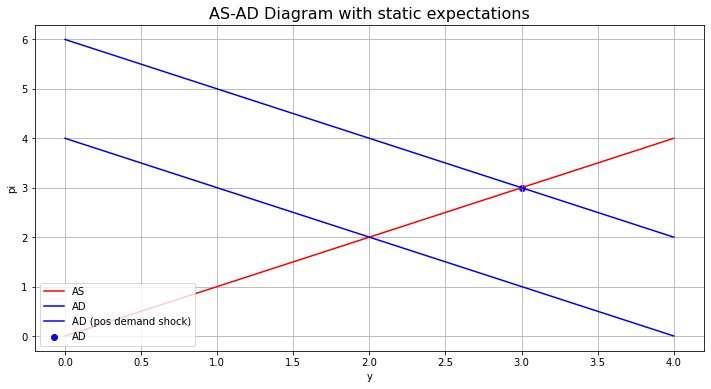

In [217]:
pif = 2
ybar = 2
erbef = 0
beta1 = 1
gamma = 1
start = 0
end = 4
mesh= 100


grid = np.linspace(start, end, mesh) 
# print(grid)
AD_plot = AD(pif, erbef, beta1, ybar, 0, grid)
AD_plot_shock = AD(pif, erbef, beta1, ybar, 2, grid)
AS_plot = AS(pif, gamma, ybar, 0, grid)
y_eq, pi_eq = equilibrium(pif, erbef, beta1, gamma, ybar, 2, 0)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot on primary y-axis
ax1.plot(grid, AS_plot, label='AS', color = 'red')
ax1.plot(grid, AD_plot, label='AD', color = 'blue')
ax1.plot(grid, AD_plot_shock, label='AD (pos demand shock)', color = 'blue')
ax1.scatter(y_eq, pi_eq, label='AD', color = 'blue')
ax1.set_xlabel('y')
ax1.set_ylabel('pi')
ax1.grid(True, zorder=0)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='lower left')
plt.title("AS-AD Diagram with static expectations", fontsize = 16) 

plt.show() 

In [242]:
# Grid parameters
start = 0 
end = 4
mesh = 100

# Model parameters (AS)
gamma = 2 # From the Phillips curve

# Model parameters (AD)
beta1 = 2 

# Equilibrium
ybar = 2 # Natural level of output
pif = 2 # Inflation target

# Shocks 
z = 2.5 # Demand shock
s = 1.6 # Supply shock

# Plot 
N = 4 # Number of AD curves to plot
T = 8 # Number of periods shown in IRF

grid = np.linspace(start, end, mesh)
T_grid = [t for t in range(T+1)]

# 
y_seq, pi_seq, AS_seq, AD_seq = AS_solve(pif, beta1, gamma, ybar, z, s, N, grid)
# y_hat, pi_hat = IRF(alpha2, h, b, gamma, ybar, pistar, z, s, T)
# y_hat, pi_hat = y_hat_ii, pi_hat_ii = IRF(alpha2, h, b, gamma, ybar, pistar, 2, s, T)
y_hat, pi_hat, er = IRF(pif, beta1, gamma, ybar, z, s, T)

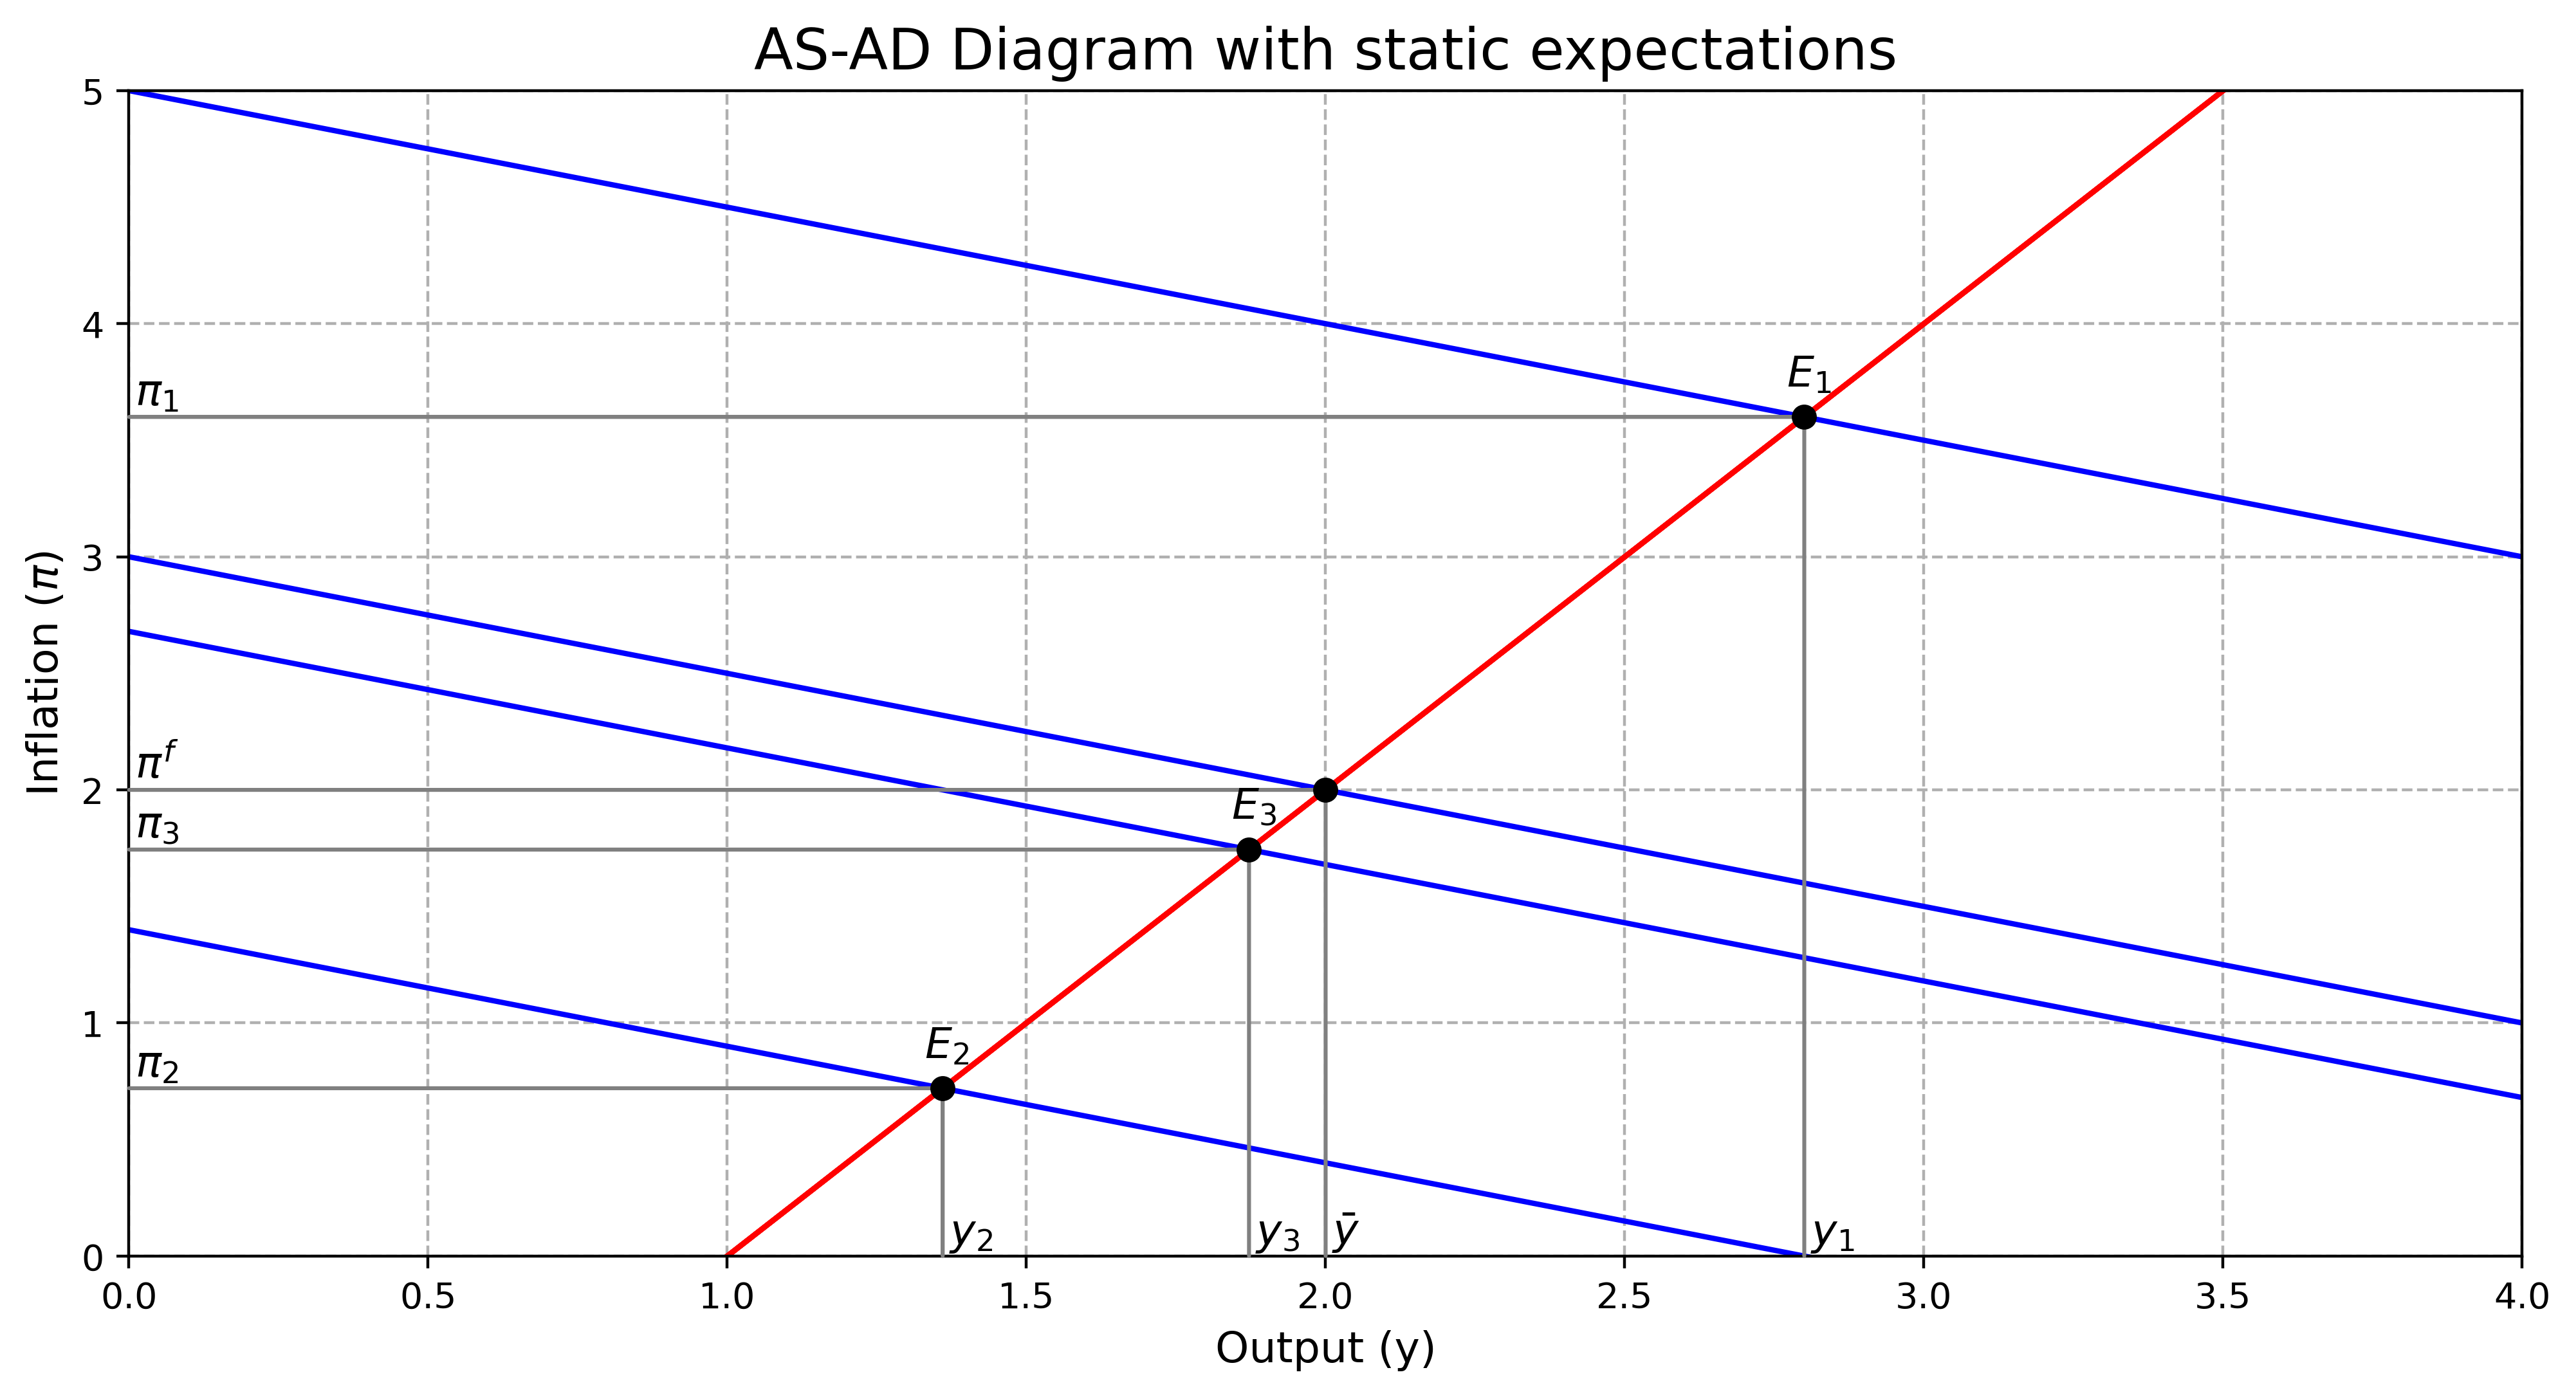

In [182]:
fig, ax1 = plt.subplots(figsize=(12, 6), dpi = 400)

# Plot on primary y-axis
ax1.scatter(y_seq, pi_seq, label='AD', color = 'black', zorder=4)
ax1.plot(grid, AS_seq, label='AS', color = 'red')
ax1.plot(grid, AD_seq, label='AD', color = 'blue')
ax1.set_xlabel('Output (y)', fontsize = 12)
ax1.set_ylabel('Inflation ($\pi$)', fontsize = 12)
ax1.grid(True, zorder=0, linestyle = '--')
ax1.set_ylim((0, int(max(pi_seq)+2)))
ax1.set_xlim((grid[0], grid[-1]))
# plt.text(pi_seq[0]+0.05, y_seq[0]-0.05, '$(\pi^*,\hat{y})$',fontsize = 14)
# plt.annotate("",xy=(pi_seq[0], y_seq[0]), xytext=(ybar, 0), arrowprops=dict(width=1, color='k', headwidth=5, headlength=5))
# plt.annotate("",xy=(pi_seq[0], y_seq[0]), xytext=(0, pif), arrowprops=dict(width=1, color='k', headwidth=5, headlength=5))

for i in range(N):
    plt.annotate("",xy=(y_seq[i], pi_seq[i]), xytext=(y_seq[i], 0), arrowprops=dict(width=0.1, color='grey', headwidth=0.01, headlength=0.01))
    plt.annotate("",xy=(y_seq[i], pi_seq[i]), xytext=(0, pi_seq[i]), arrowprops=dict(width=0.1, color='grey', headwidth=0.01, headlength=0.01))

for i in range(1,N):
    plt.text(y_seq[i]-0.03, pi_seq[i]+0.13, f'$E_{i}$',fontsize = 12)

plt.text(y_seq[0]+0.01, 0.05, r'$\bar{y}$',fontsize = 12)
plt.text(0.01, pi_seq[0]+0.05, '$\pi^f$',fontsize = 12)
for i in range(1,N):
    plt.text(y_seq[i]+0.01, 0.05, f'$y_{i}$',fontsize = 12)
    plt.text(0.01, pi_seq[i]+0.05, f'$\pi_{i}$',fontsize = 12)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='lower left')
plt.title("AS-AD Diagram with static expectations", fontsize = 16) 

plt.show() 

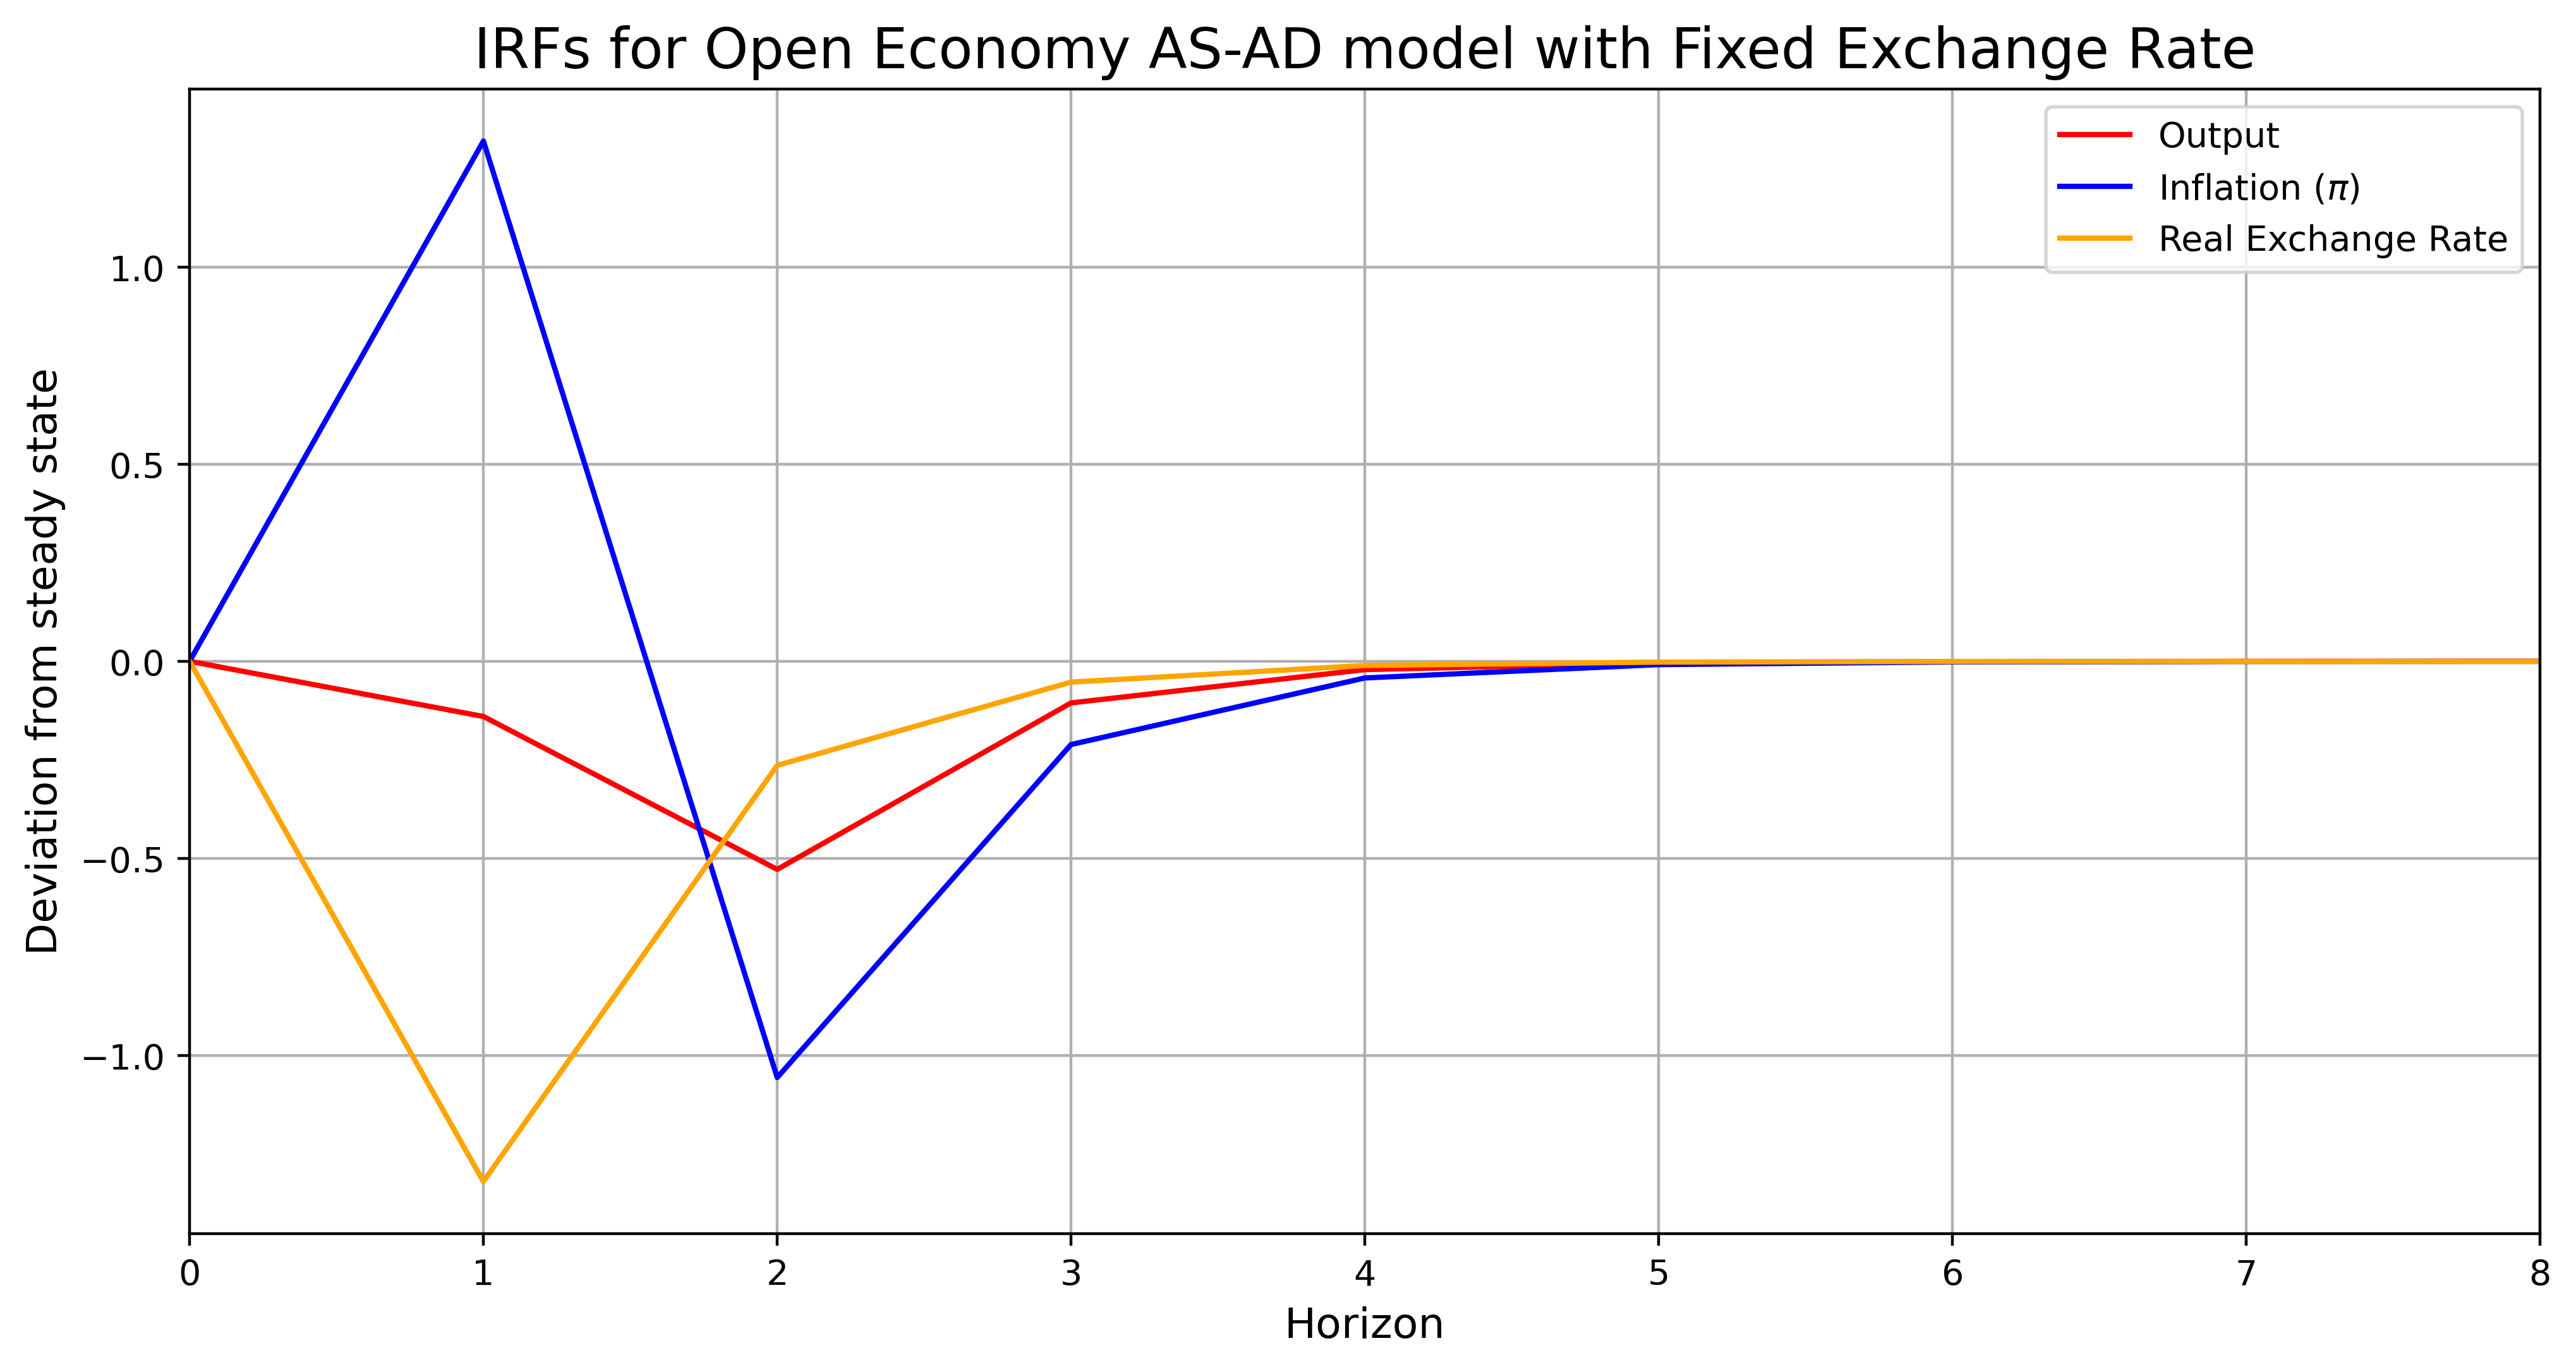

In [246]:
fig, ax1 = plt.subplots(figsize=(12, 6), dpi = 400)

# Plot on primary y-axis
ax1.plot(T_grid, y_hat, label='Output', color = 'red')
# ax1.plot(T_grid, y_hat_ii, '--', label='IRF for output (1 period shock)', color = 'green')
ax1.plot(T_grid, pi_hat, label=r'Inflation $(\pi)$', color = 'blue')
ax1.plot(T_grid, er, label='Real Exchange Rate', color = 'orange')
# ax1.plot(T_grid, pi_hat_ii, '--', label='IRF for inflation (1 period shock)', color = 'orange')
ax1.set_xlabel('Horizon', fontsize = 12)
ax1.set_ylabel('Deviation from steady state', fontsize = 12)
ax1.set_xlim((T_grid[0], T_grid[-1]))

ax1.grid(True, zorder=0)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper right')
plt.title("IRFs for Open Economy AS-AD model with Fixed Exchange Rate", fontsize = 16) 

plt.show() 

# An interactive plot of the AS-AD model
We start of by rerembering that the AS-AD model for the small open economy with a credible fixed exchange rate can be summerized by the two equations: 
\begin{align}
\pi_t&=\pi_t^f+\gamma(y_t-\bar{y})+s_t \tag{AS} \\
\pi_t&=e_{t-1}^r+\pi_t^f-\frac{1}{\beta_1}(y_t-\bar{y}-z_t)  \tag{AD} \\
e_t^r&=e_{t-1}^r+\pi_t^f-\pi_t \tag{Exchange rate dynamics}
\end{align}

In [247]:
def inter_plot(pif, beta1, gamma, ybar, z, s, N, grid):
    y_seq, pi_seq, AS_seq, AD_seq = AS_solve(pif, beta1, gamma, ybar, z, s, N, grid)
    fig, ax1 = plt.subplots(figsize=(12, 6), dpi = 400)

    # Plot on primary y-axis
    ax1.scatter(y_seq, pi_seq, label='AD', color = 'black', zorder=4)
    ax1.plot(grid, AS_seq, label='AS', color = 'red')
    ax1.plot(grid, AD_seq, label='AD', color = 'blue')
    ax1.set_xlabel('Output (y)', fontsize = 12)
    ax1.set_ylabel('Inflation ($\pi$)', fontsize = 12)
    ax1.grid(True, zorder=0, linestyle = '--')
    ax1.set_ylim((0, int(max(pi_seq)+2)))
    ax1.set_xlim((grid[0], int(max(y_seq)+2)))
    # plt.text(pi_seq[0]+0.05, y_seq[0]-0.05, '$(\pi^*,\hat{y})$',fontsize = 14)

    for i in range(N):
        plt.annotate("",xy=(y_seq[i], pi_seq[i]), xytext=(y_seq[i], 0), arrowprops=dict(width=0.1, color='grey', headwidth=0.01, headlength=0.01))
        plt.annotate("",xy=(y_seq[i], pi_seq[i]), xytext=(0, pi_seq[i]), arrowprops=dict(width=0.1, color='grey', headwidth=0.01, headlength=0.01))

    for i in range(1,N):
        plt.text(y_seq[i]-0.03, pi_seq[i]+0.08, f'$E_{i}$',fontsize = 12)

    plt.text(y_seq[0]+0.01, 0.05, r'$\bar{y}$',fontsize = 10)
    plt.text(0.01, pi_seq[0]+0.02, '$\pi^f$',fontsize = 10)
    for i in range(1,N):
        plt.text(y_seq[i]+0.01, 0.05, f'$y_{i}$',fontsize = 10)
        plt.text(0.01, pi_seq[i]+0.05, f'$\pi_{i}$',fontsize = 10)

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    # ax1.legend(lines, labels, loc='lower left')
    plt.title("AS-AD Diagram for Small Open Economy with Fixed Exchange Rate", fontsize = 16) 

    plt.show() 

In [248]:
# Default values for the plot
default_ybar = 2.0
default_pif = 2.0
default_N = 5
default_grid = np.linspace(0, 6, 100)

# Creating sliders for different model parameters
z_slider = widgets.FloatSlider(value=1,min=-4.0,max=4.0,step=0.1,description=r"$z$",continuous_update=False)
s_slider = widgets.FloatSlider(value=0,min=-4.0,max=4.0,step=0.1,description=r"$s$",continuous_update=False)
beta1_slider = widgets.FloatSlider(value=1.5,min=0.0,max=3.0,step=0.1,description=r"$\beta_1$",continuous_update=False)
gamma_slider = widgets.FloatSlider(value=1.5,min=0.0,max=3.0,step=0.1,description=r"$\gamma$",continuous_update=False)
N_slider = widgets.FloatSlider(value=4,min=0,max=5,step=1,description=r"$\gamma$",continuous_update=False)

# Create the interactive plot
interactive_plot = interactive(inter_plot, pif=fixed(default_pif), beta1=beta1_slider, gamma=gamma_slider, 
                               ybar=fixed(default_ybar), z=z_slider, s=s_slider, N=(1,5,1), 
                               grid=fixed(default_grid))

output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='$\\beta_1$', max=3.0), Floa…